In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns
import os
import datetime
import keras
import cv2

/home/wurst/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wurst/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wurst/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wurst/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

### Load images into RAM and scale them to a fixed size

In [2]:
images_size = 40 # width and height

scaled_faces = np.array([
    cv2.resize(cv2.cvtColor(cv2.imread('photos/faces_pure/' + f), cv2.COLOR_BGR2RGB), (images_size, images_size)) / 255
               for f in os.listdir('photos/faces_pure')
])

print(scaled_faces.shape)

(8423, 40, 40, 3)


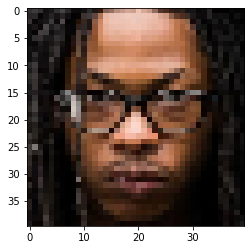

In [3]:
plt.imshow(scaled_faces[2])

In [4]:
import sklearn.decomposition

encoding_size = 40

pca = sklearn.decomposition.PCA(n_components=encoding_size)
pca.fit(scaled_faces.reshape(-1, images_size*images_size*3))

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
test_enc = pca.transform(scaled_faces[2].reshape(1, -1))
test_enc

array([[-17.26819305,   4.6378362 ,  -0.78546945,   5.99887504,
         -0.18940127,  -5.03815145,  -3.8656252 ,   3.32860197,
         -0.21695932,   0.9819352 ,   1.29308143,  -1.27066909,
         -0.71638133,   0.41144719,   0.56969004,  -0.29494687,
         -1.01367915,   0.61140684,   0.86140165,  -0.07422683,
         -0.06423635,   0.15953399,   0.32938572,  -0.42481105,
         -1.15067137,   1.23150385,  -1.26224494,   0.42234228,
         -0.03353993,  -0.35762864,  -0.13962652,   0.62013969,
         -0.03478604,   0.82419862,   1.00262657,   0.5409933 ,
         -0.5557605 ,  -0.38640848,   0.13147402,   0.50502102]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


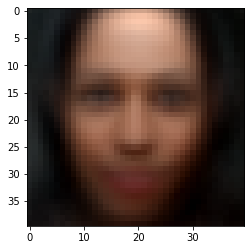

In [6]:
test_dec = pca.inverse_transform(test_enc).reshape(images_size, images_size, 3)
plt.imshow(test_dec)

### Compute loss achieved by PCA

In [7]:
encoded_faces = pca.transform(scaled_faces.reshape(-1, images_size*images_size*3))
decoded_faces = pca.inverse_transform(encoded_faces).reshape(-1, images_size, images_size, 3)

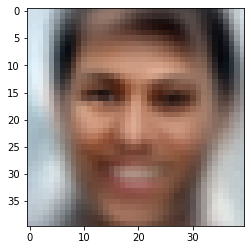

In [8]:
plt.imshow(decoded_faces[5])

In [9]:
img = scaled_faces[5]
dec = decoded_faces[5]
sklearn.metrics.mean_squared_error(y_true=img.reshape(-1), y_pred=dec.reshape(-1))

0.013748943528744938

### Save PCA to file

In [10]:
import pickle

with open('data/pca.model', 'wb') as f:
    f.write(pickle.dumps(pca))